### 关于新手入门的建议

现在你对数据有了更深入的了解，并且知道我是如何探索“如何入门技术领域”这个问题的。现在轮到你自己动手来回答下面的问题了。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import HowToBreakIntoTheField as t
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Question 1

**1.** 为了理解如何入门技术领域这个问题，需要先理解 **CousinEducation** 特征列。使用 **schema** 数据集来回答这一问题，完成这个名为 **get_description** 的函数，该函数的参数为 **schema** 数据集和 **column_name** 列名，返回的是该列的具体描述。 

In [2]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [3]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    #下述两种方法得到的结果为何不同？？？？？？
    desc = schema[schema.Column == column_name]['Question'].to_string(index=False)
    desc1 = list(schema[schema.Column == column_name]['Question'])[0]

    return desc1
#test your code
#Check your function against solution - you shouldn't need to change any of the below code
get_description(df.columns[0]) # This should return a string of the first column description

'Respondent ID number'

In [4]:
descrips = set(get_description(col) for col in df.columns)
# descrips

In [5]:
#Check your function against solution - you shouldn't need to change any of the below code
descrips = set(get_description(col) for col in df.columns)
t.check_description(descrips)

Nice job it looks like your function works correctly!


我们想要探索的问题是如何入门技术领域，所以要使用 **get_description** 函数查看 **CousinEducation** 特征列的具体描述。

In [6]:
get_description('CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

#### Question 2

**2.** 给出 **CousinEducation** 列中每种类别的数量，返回的数据类型是 Pandas Series。将返回的 Series 存储在 **cous_ed_vals** 变量中。如果你的回答是正确的，那应该能看到一个类别分布的柱状图。如果结果看上去不太好，从中得不到任何有用的信息，那就要仔细看一下注释，别忘了清理数据！

In [23]:
CousinEducation_count = df['CousinEducation'].value_counts().reset_index()#Provide a pandas series of the counts for each CousinEducation status
CousinEducation_count.rename(columns={'index': 'method', 'CousinEducation': 'cous_ed_vals'}, inplace = True)
CousinEducation_count['cous_ed_vals'].head()

0    192
1    167
2    158
3    140
4    132
Name: cous_ed_vals, dtype: int64

In [24]:
cous_ed_vals = CousinEducation_count['cous_ed_vals']#Provide a pandas series of the counts for each CousinEducation status

cous_ed_vals # assure this looks right

0      192
1      167
2      158
3      140
4      132
5      129
6      121
7      115
8       95
9       91
10      89
11      86
12      82
13      79
14      78
15      74
16      68
17      66
18      64
19      63
20      62
21      60
22      59
23      55
24      51
25      51
26      49
27      49
28      47
29      46
      ... 
571      1
572      1
573      1
574      1
575      1
576      1
577      1
578      1
579      1
580      1
581      1
582      1
583      1
584      1
585      1
586      1
587      1
588      1
589      1
590      1
591      1
592      1
593      1
594      1
595      1
596      1
597      1
598      1
599      1
600      1
Name: cous_ed_vals, Length: 601, dtype: int64

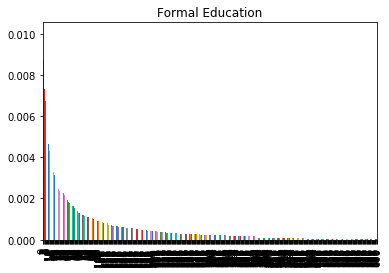

In [25]:
# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(cous_ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

一定要对数据进行清理，上面就是没有对数据进行清理的结果。下面我使用的代码跟之前视频里的代码一样，前提是数据已经被清理过了。

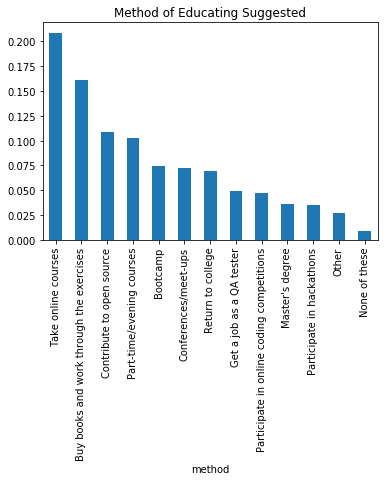

In [26]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = t.total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

#### Question 3

**3.** 有学位的人会不会更会推荐他人去获取学位呢？完成下面的函数，该函数的参数是 **df** 中 **FormalEducation** 列的每个元素项（也就是对 **FormalEducation** 列 apply 该函数）。 

In [28]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Doctoral", "Professional degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ("Master's degree", "Doctoral", "Professional degree"):
        return 1
    else:
        return 0

df["FormalEducation"].apply(higher_ed)[:5] #Test your function to assure it provides 1 and 0 values for the df

0    0
1    0
2    0
3    0
4    1
Name: FormalEducation, dtype: int64

In [29]:
# Check your code here
df['HigherEd'] = df["FormalEducation"].apply(higher_ed)
higher_ed_perc = df['HigherEd'].mean()
t.higher_ed_test(higher_ed_perc)

Nice job!  That's right.  The percentage of individuals in these three groups is 0.2302376714480159.


#### Question 4

**4.** 现在来看一下有学位的人跟没学位的人相比，会不会更倾向于推荐新手攻读学位。将数据中 **HigherEd** 等于 1 的部分存储在 **ed_1** 变量中；将数据中 **HigherEd** 等于 0 的部分存储在 **ed_0** 变量中。

需要注意的是，你已经在上面创建 **HigherEd** 列了，现在需要做的只是在这一列上进行数据筛选。

In [30]:
ed_1 = df[df.HigherEd == 1]# Subset df to only those with HigherEd of 1
ed_0 = df[df.HigherEd == 0]# Subset df to only those with HigherEd of 0


print(ed_1['HigherEd'][:5]) #Assure it looks like what you would expect
print(ed_0['HigherEd'][:5]) #Assure it looks like what you would expect

4     1
6     1
7     1
9     1
14    1
Name: HigherEd, dtype: int64
0    0
1    0
2    0
3    0
5    0
Name: HigherEd, dtype: int64


In [31]:
#Check your subset is correct - you should get a plot that was created using pandas styling
#which you can learn more about here: https://pandas.pydata.org/pandas-docs/stable/style.html

ed_1_perc = clean_and_plot(ed_1, 'Higher Formal Education', plot=False)
ed_0_perc = clean_and_plot(ed_0, 'Max of Bachelors Higher Ed', plot=False)

comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
method,,,
Take online courses,0.205361,0.21009,-0.00472961
Buy books and work through the exercises,0.163579,0.160257,0.00332183
Contribute to open source,0.106031,0.110053,-0.00402243
Part-time/evening courses,0.101498,0.103005,-0.00150699
Bootcamp,0.0731179,0.0740695,-0.000951639
Return to college,0.0691762,0.0691233,5.29081e-05
Conferences/meet-ups,0.0670083,0.0740695,-0.00706122
Master's degree,0.0557745,0.0302337,0.0255408
Get a job as a QA tester,0.0508475,0.0481019,0.00274557


#### Question 5

**5.** 上面的图表展现了什么信息？下列字典中的陈述，对于上面图表可以得出的结论，将其对应的值修改为 **True**，不能得出的结论则保留原来的 **False**。

In [37]:
sol = {'Everyone should get a higher level of formal education': False, 
       #无论正规教育如何，在线课程都是最受建议的教育形式
       'Regardless of formal education, online courses are the top suggested form of education': True,
       #两种教育形式的建议相差不到1％
       'There is less than a 1% difference between suggestions of the two groups for all forms of education': False,
       #受过正规教育的人比没有受过教育的人建议更多
       'Those with higher formal education suggest it more than those who do not have it': True}

t.conclusions(sol)

Nice job that looks right!


这就从另一种角度对比了从业者对教育方式的建议。